In [2]:
import pandas as pd

# Cargar archivo
df = pd.read_csv("/content/ventas_ecommerce.csv")

# Vista previa
df.head()


,id_venta,fecha,producto,categoria,cliente_id,ciudad,cantidad,precio_unitario,estado_pago,ingreso_total
0,V0001,2025-01-01,Audífonos Sony,Audio,C1001,Antofagasta,2,45247,Pagado,90494
1,V0002,2025-01-02,Webcam Logitech,Audio,C1005,Valparaíso,1,39222,Pagado,39222
2,V0003,2025-01-03,Teclado Redragon,Audio,C1010,Santiago,4,36211,Pagado,144844
3,V0004,2025-01-04,Webcam Logitech,Accesorios,C1015,Valparaíso,2,47220,Pagado,94440
4,V0005,2025-01-05,Webcam Logitech,Audio,C1015,Santiago,2,36646,Moroso,73292


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_venta         100 non-null    object
 1   fecha            100 non-null    object
 2   producto         100 non-null    object
 3   categoria        100 non-null    object
 4   cliente_id       100 non-null    object
 5   ciudad           100 non-null    object
 6   cantidad         100 non-null    int64 
 7   precio_unitario  100 non-null    int64 
 8   estado_pago      100 non-null    object
 9   ingreso_total    100 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

,0
id_venta,0
fecha,0
producto,0
categoria,0
cliente_id,0
ciudad,0
cantidad,0
precio_unitario,0
estado_pago,0
ingreso_total,0


# Productos más vendidos

In [6]:
productos_mas_vendidos = df.groupby("producto")["cantidad"].sum().sort_values(ascending=False)
print(productos_mas_vendidos)


producto
Audífonos Sony      65
Mouse Logitech      50
Webcam Logitech     48
Parlante JBL        45
Teclado Redragon    38
Name: cantidad, dtype: int64


# 💸 Ingresos por producto

In [7]:
ingreso_por_producto = df.groupby("producto")["ingreso_total"].sum().sort_values(ascending=False)
print(ingreso_por_producto)


producto
Audífonos Sony      2052528
Webcam Logitech     1615311
Mouse Logitech      1554329
Parlante JBL        1302491
Teclado Redragon    1165693
Name: ingreso_total, dtype: int64


#🌍 Ventas por ciudad

In [8]:
ventas_por_ciudad = df["ciudad"].value_counts()
print(ventas_por_ciudad)


ciudad
Valparaíso     30
Concepción     24
Antofagasta    23
Santiago       23
Name: count, dtype: int64


#🕒 Ventas por mes

In [9]:
df["fecha"] = pd.to_datetime(df["fecha"])
df["mes"] = df["fecha"].dt.month

ventas_por_mes = df.groupby("mes")["id_venta"].count()
print(ventas_por_mes)


mes
1    31
2    28
3    31
4    10
Name: id_venta, dtype: int64


#🚨 Clientes morosos

In [10]:
total_clientes = df["cliente_id"].nunique()
morosos = df[df["estado_pago"] == "Moroso"]["cliente_id"].nunique()

porcentaje_morosos = (morosos / total_clientes) * 100
print(f"Clientes únicos: {total_clientes}")
print(f"Clientes morosos: {morosos}")
print(f"Porcentaje de clientes morosos: {porcentaje_morosos:.2f}%")


Clientes únicos: 20
Clientes morosos: 11
Porcentaje de clientes morosos: 55.00%


#Visualizaciones

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo bonito
sns.set(style="whitegrid")


#📦 Gráfico: Productos más vendidos

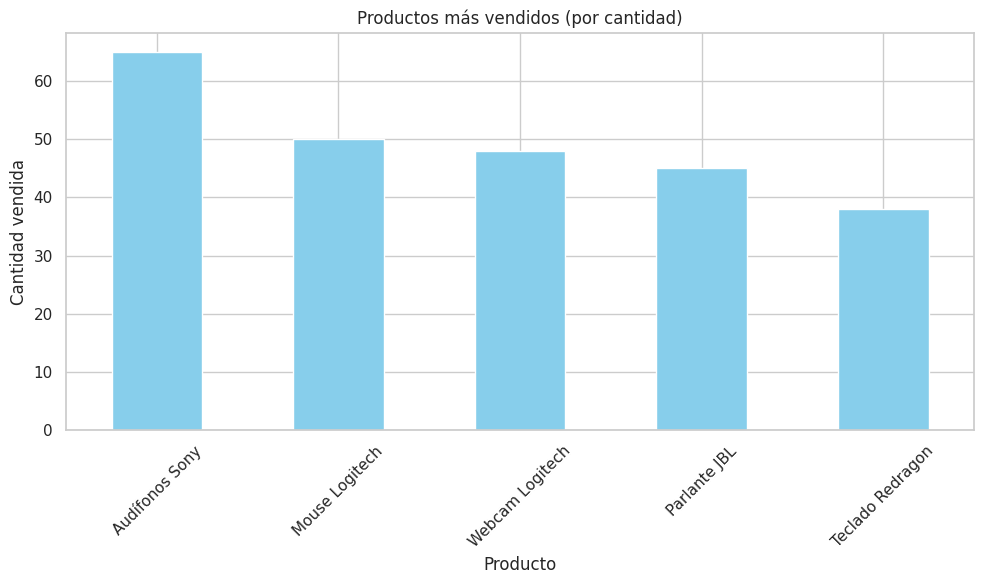

In [12]:
plt.figure(figsize=(10, 6))
productos_mas_vendidos.plot(kind="bar", color="skyblue")
plt.title("Productos más vendidos (por cantidad)")
plt.xlabel("Producto")
plt.ylabel("Cantidad vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#💰 Gráfico: Ingreso por producto

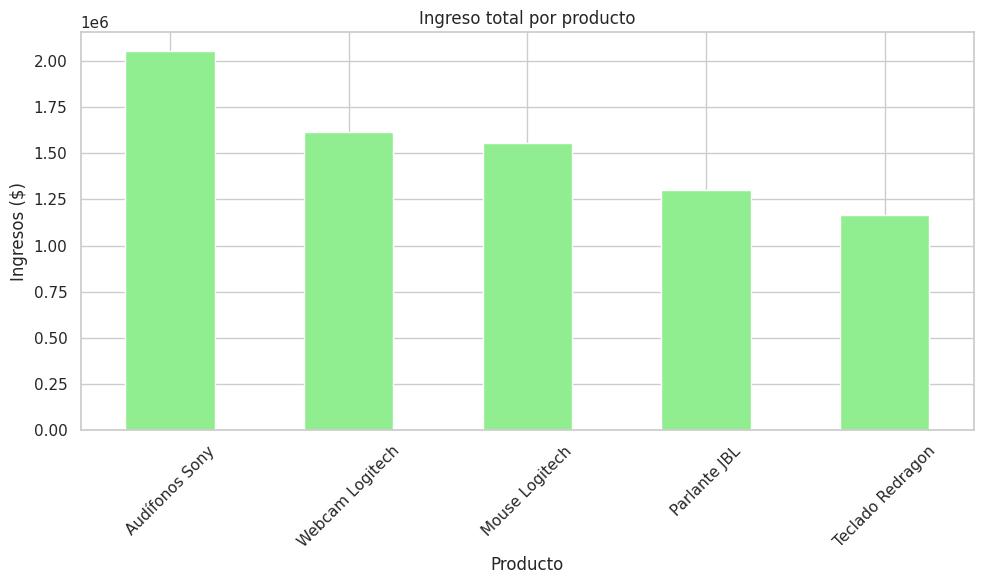

In [13]:
plt.figure(figsize=(10, 6))
ingreso_por_producto.plot(kind="bar", color="lightgreen")
plt.title("Ingreso total por producto")
plt.xlabel("Producto")
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#🌍 Gráfico: Ventas por ciudad


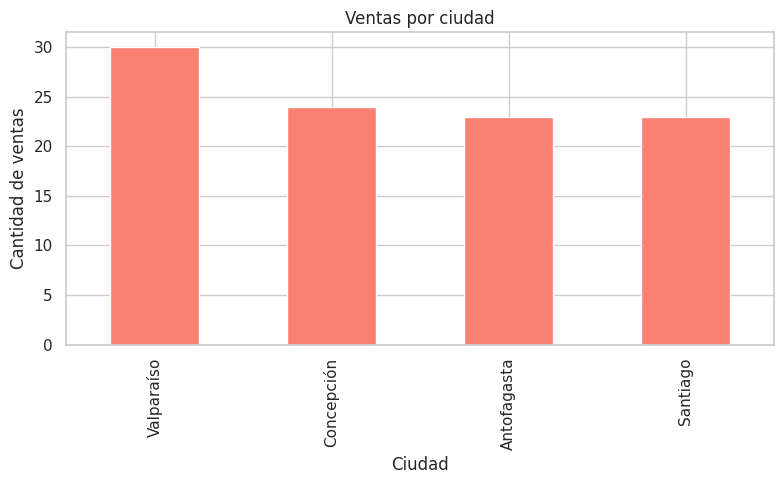

In [14]:
plt.figure(figsize=(8, 5))
ventas_por_ciudad.plot(kind="bar", color="salmon")
plt.title("Ventas por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad de ventas")
plt.tight_layout()
plt.show()


 # 🕒 Gráfico: Ventas por mes

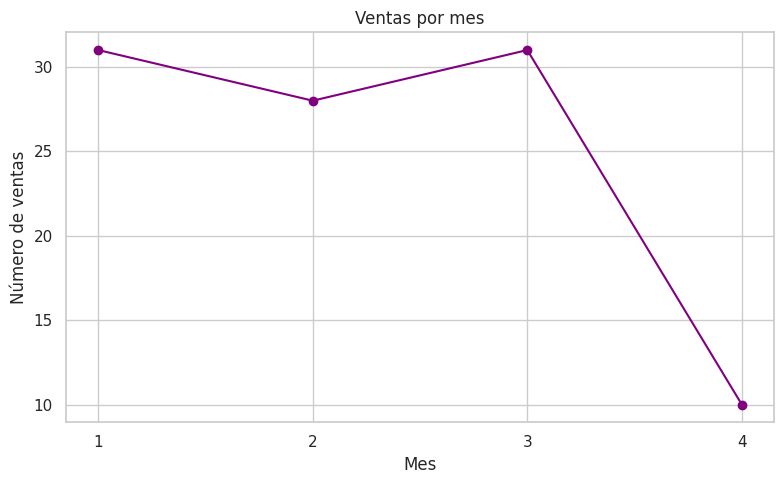

In [15]:
plt.figure(figsize=(8, 5))
ventas_por_mes.plot(kind="line", marker="o", color="purple")
plt.title("Ventas por mes")
plt.xlabel("Mes")
plt.ylabel("Número de ventas")
plt.xticks(ventas_por_mes.index)
plt.grid(True)
plt.tight_layout()
plt.show()


#🚦 Pie chart: Estado de pago

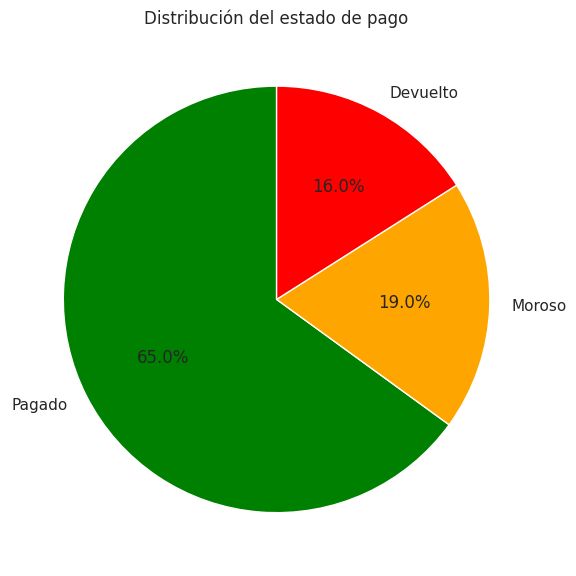

In [16]:
plt.figure(figsize=(6, 6))
estado_counts = df["estado_pago"].value_counts()
estado_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["green", "orange", "red"])
plt.title("Distribución del estado de pago")
plt.ylabel("")
plt.tight_layout()
plt.show()
